In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import missingno as msno 

In [2]:
spark = SparkSession.builder \
    .appName("Weather Data") \
    .getOrCreate()

In [3]:
file_path = "../data/weatherAUS.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

df.show()

+----------+--------+-------+-------+--------+-----------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
|      Date|Location|MinTemp|MaxTemp|Rainfall|Evaporation|Sunshine|WindGustDir|WindGustSpeed|WindDir9am|WindDir3pm|WindSpeed9am|WindSpeed3pm|Humidity9am|Humidity3pm|Pressure9am|Pressure3pm|Cloud9am|Cloud3pm|Temp9am|Temp3pm|RainToday|RainTomorrow|
+----------+--------+-------+-------+--------+-----------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
|2008-12-01|  Albury|   13.4|   22.9|     0.6|         NA|      NA|          W|           44|         W|       WNW|          20|          24|         71|         22|     1007.7|     1007.1|       8|      NA|   16.9|   21.8|       No|          No|
|2008-12-02|

In [4]:
print(type(df)) 

<class 'pyspark.sql.dataframe.DataFrame'>


In [5]:
weather_data = df.toPandas()
weather_data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NA,NA,W,44,W,...,71,22,1007.7,1007.1,8,NA,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0,NA,NA,WNW,44,NNW,...,44,25,1010.6,1007.8,NA,NA,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0,NA,NA,WSW,46,W,...,38,30,1007.6,1008.7,NA,2,21,23.2,No,No
3,2008-12-04,Albury,9.2,28,0,NA,NA,NE,24,SE,...,45,16,1017.6,1012.8,NA,NA,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1,NA,NA,W,41,ENE,...,82,33,1010.8,1006,7,8,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NA,NA,WNW,56,W,...,55,23,1009.2,1005.4,NA,NA,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25,0,NA,NA,W,50,SW,...,49,19,1009.6,1008.2,1,NA,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0,NA,NA,W,35,SSE,...,48,19,1013.4,1010.1,NA,NA,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0,NA,NA,NNW,80,SE,...,42,9,1008.9,1003.6,NA,NA,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NA,NA,W,28,S,...,58,27,1007,1005.7,NA,NA,20.1,28.2,Yes,No


In [6]:
print(type(weather_data)) 

<class 'pandas.core.frame.DataFrame'>


In [7]:
# Define a list of placeholder representations for missing values
placeholders = ['NA', '', 'null']  # Add any other placeholders as needed

# Replace placeholder values with NaN across all columns
for column in weather_data.columns:
    # Replace placeholders with NaN
    weather_data[column] = weather_data[column].replace(placeholders, pd.NA)

# After transformations, check for remaining NULLs
null_counts = weather_data.isnull().sum()

# Print NULL counts to confirm changes
for column in weather_data.columns:
    print(f"NULL Count in {column}: {null_counts[column]}")

NULL Count in Date: 0
NULL Count in Location: 0
NULL Count in MinTemp: 1485
NULL Count in MaxTemp: 1261
NULL Count in Rainfall: 3261
NULL Count in Evaporation: 62790
NULL Count in Sunshine: 69835
NULL Count in WindGustDir: 10326
NULL Count in WindGustSpeed: 10263
NULL Count in WindDir9am: 10566
NULL Count in WindDir3pm: 4228
NULL Count in WindSpeed9am: 1767
NULL Count in WindSpeed3pm: 3062
NULL Count in Humidity9am: 2654
NULL Count in Humidity3pm: 4507
NULL Count in Pressure9am: 15065
NULL Count in Pressure3pm: 15028
NULL Count in Cloud9am: 55888
NULL Count in Cloud3pm: 59358
NULL Count in Temp9am: 1767
NULL Count in Temp3pm: 3609
NULL Count in RainToday: 3261
NULL Count in RainTomorrow: 3267


<Figure size 1200x600 with 0 Axes>

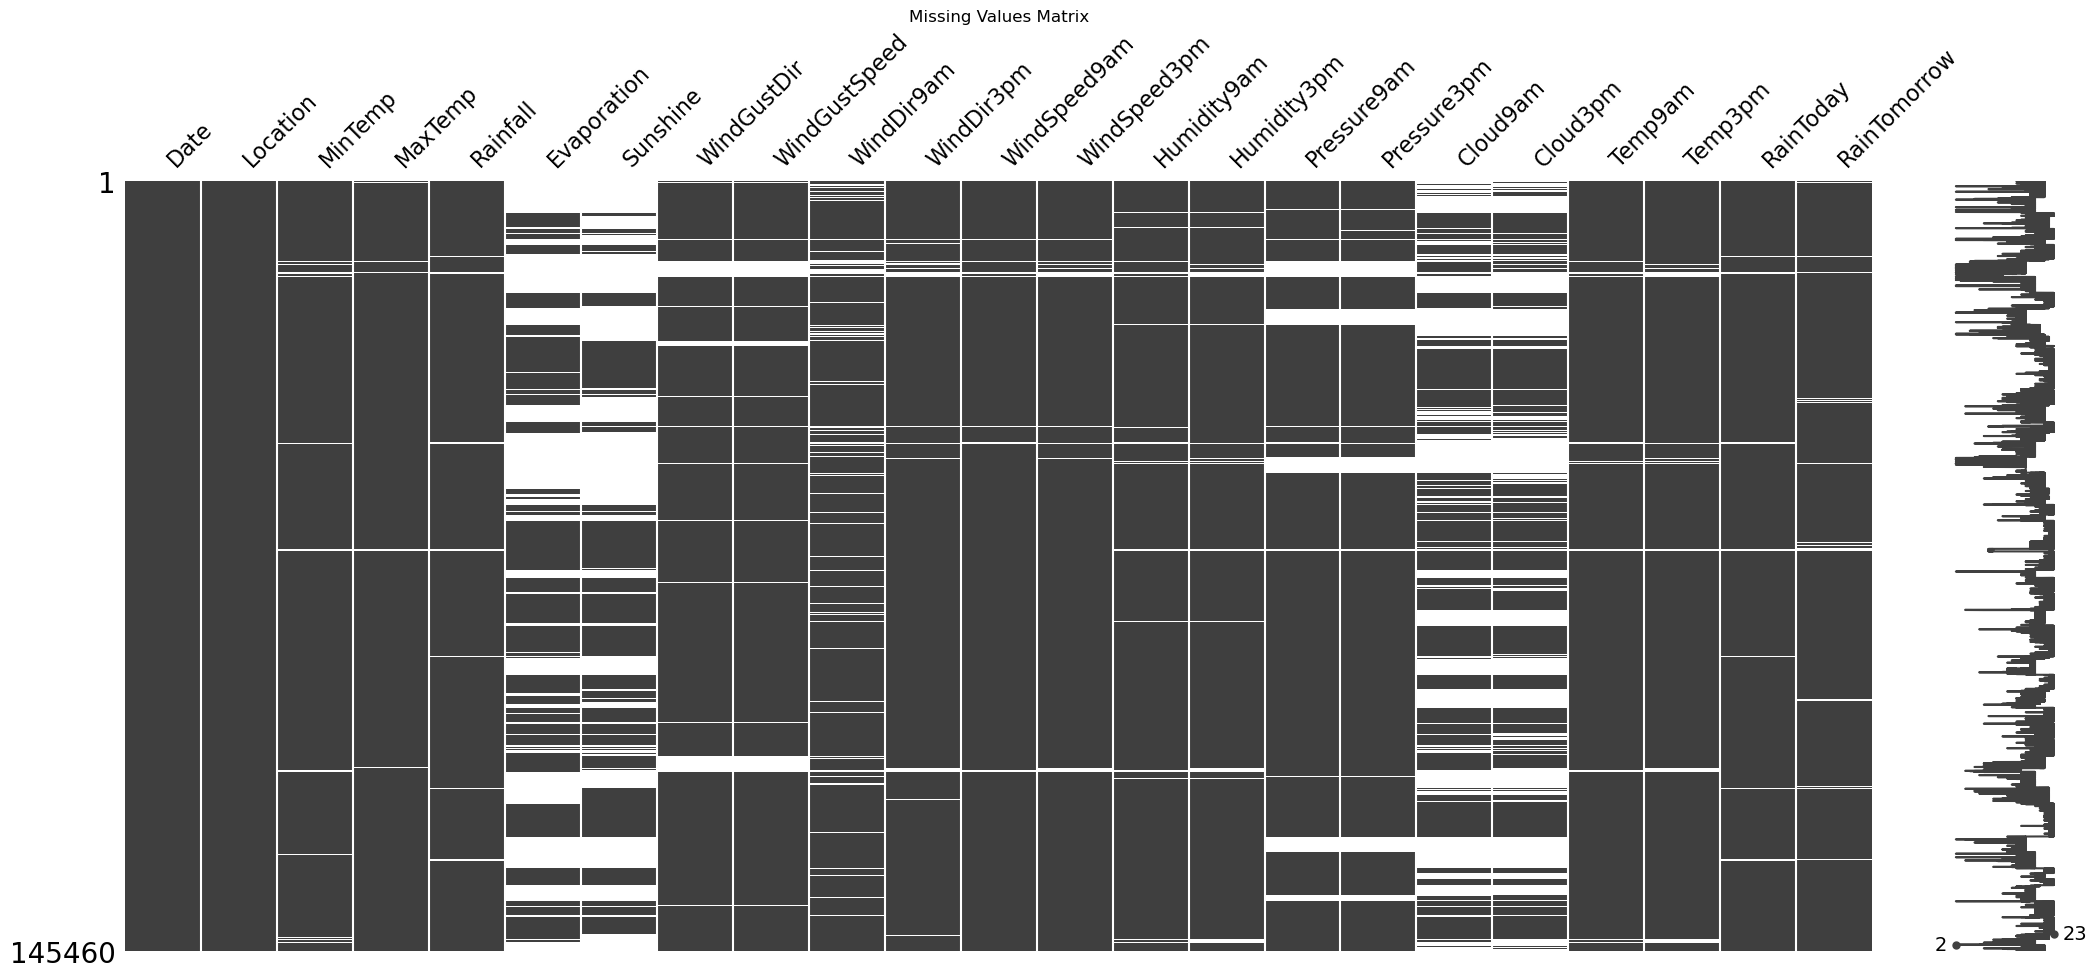

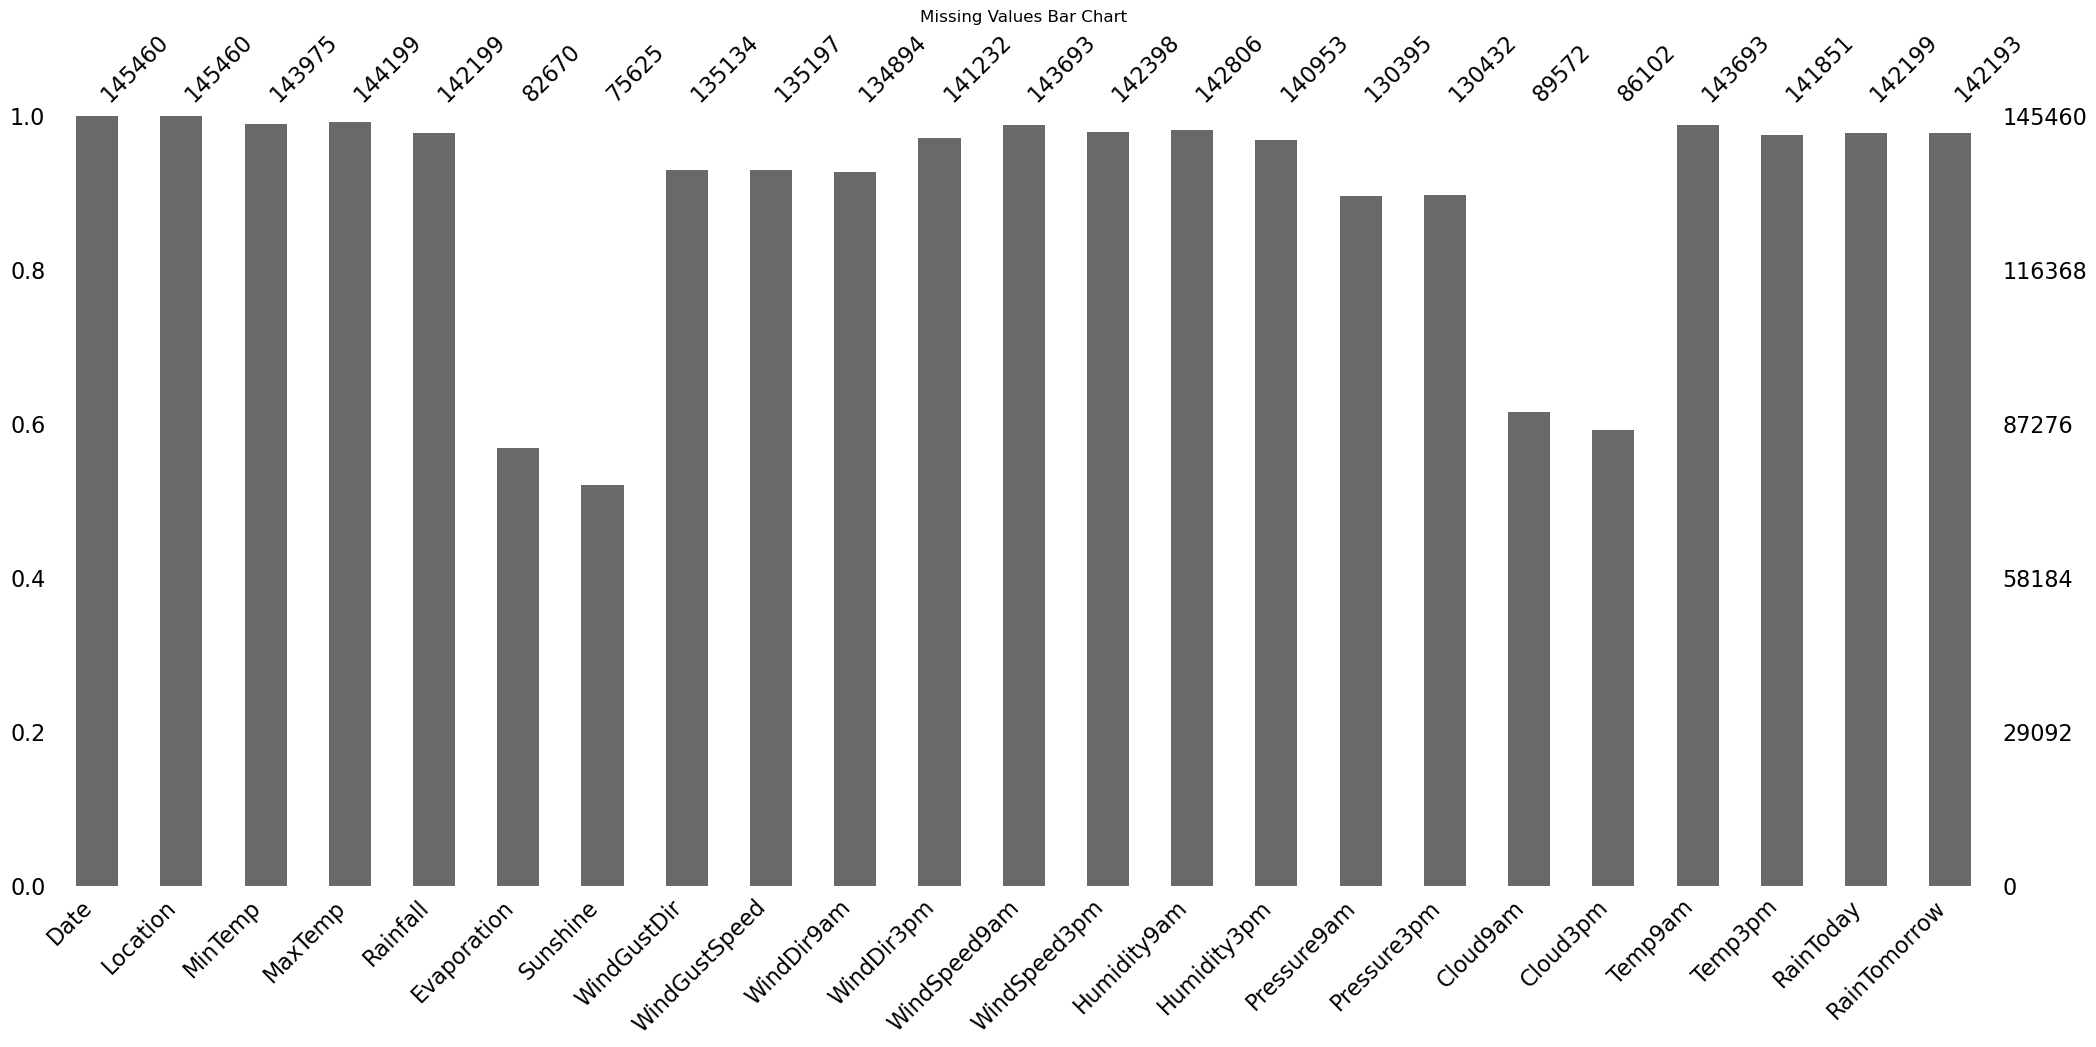

In [8]:
#Visualise Missing Values
plt.figure(figsize=(12, 6))
msno.matrix(weather_data)
plt.title('Missing Values Matrix')
plt.show()
#Visualise Missing Values
plt.figure(figsize=(12, 6))
msno.bar(weather_data)
plt.title('Missing Values Bar Chart')
plt.show()

In [9]:
weather_data_pd = weather_data.dropna(subset=['RainTomorrow', 'RainToday'])

In [10]:
#Verify that there is not any missing value after Dropping Null Values of RainTomorrow Col
weather_data_pd.RainTomorrow.isnull().sum()

0

In [11]:
#Verify that there is not any missing value after Dropping Null Values for RainTomorrow Col
weather_data_pd.RainToday.isnull().sum()

0

In [35]:
#Check for type of values
print(weather_data_pd.dtypes)

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday              category
RainTomorrow             object
dtype: object


In [28]:
# Convert 'Date' column to datetime using .loc[]
weather_data_pd.loc[:, 'Date'] = pd.to_datetime(weather_data_pd['Date'], format='%Y-%m-%d')

# Convert numeric columns, also using .loc[]
for column in numeric_columns:
    weather_data_pd.loc[:, column] = pd.to_numeric(weather_data_pd[column], errors='coerce')

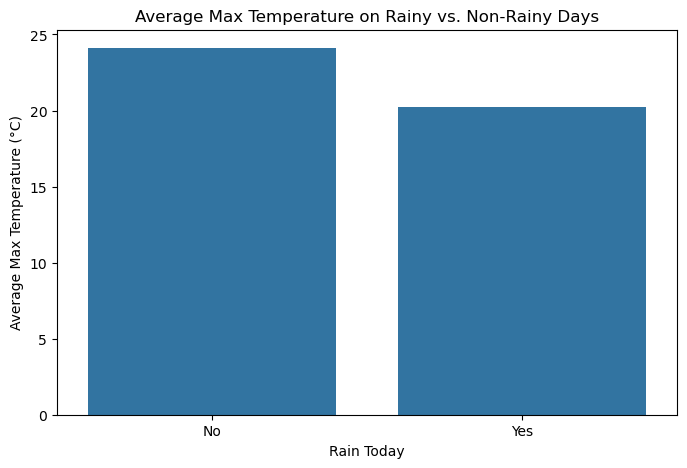

In [33]:
plt.figure(figsize=(8, 5))
sns.barplot(x='RainToday', y='MaxTemp', data=average_temp_by_rain)
plt.title('Average Max Temperature on Rainy vs. Non-Rainy Days')
plt.ylabel('Average Max Temperature (°C)')
plt.xlabel('Rain Today')
plt.show()

In [34]:
print(weather_data_pd.describe())

                                Date        MinTemp        MaxTemp  \
count                         140787  140787.000000  140787.000000   
mean   2013-03-31 12:35:10.183468288      12.184209      23.233735   
min              2007-11-01 00:00:00      -8.500000      -4.800000   
25%              2011-01-05 00:00:00       7.600000      17.900000   
50%              2013-05-27 00:00:00      12.000000      22.600000   
75%              2015-06-13 00:00:00      16.800000      28.200000   
max              2017-06-25 00:00:00      33.900000      48.100000   
std                              NaN       6.393235       7.106800   

            Rainfall    Evaporation       Sunshine  WindGustSpeed  \
count  140787.000000  140787.000000  140787.000000  131682.000000   
mean        2.349974       5.187367       8.043108      39.970520   
min         0.000000       0.000000       0.000000       6.000000   
25%         0.000000       4.000000       8.200000      31.000000   
50%         0.000000    

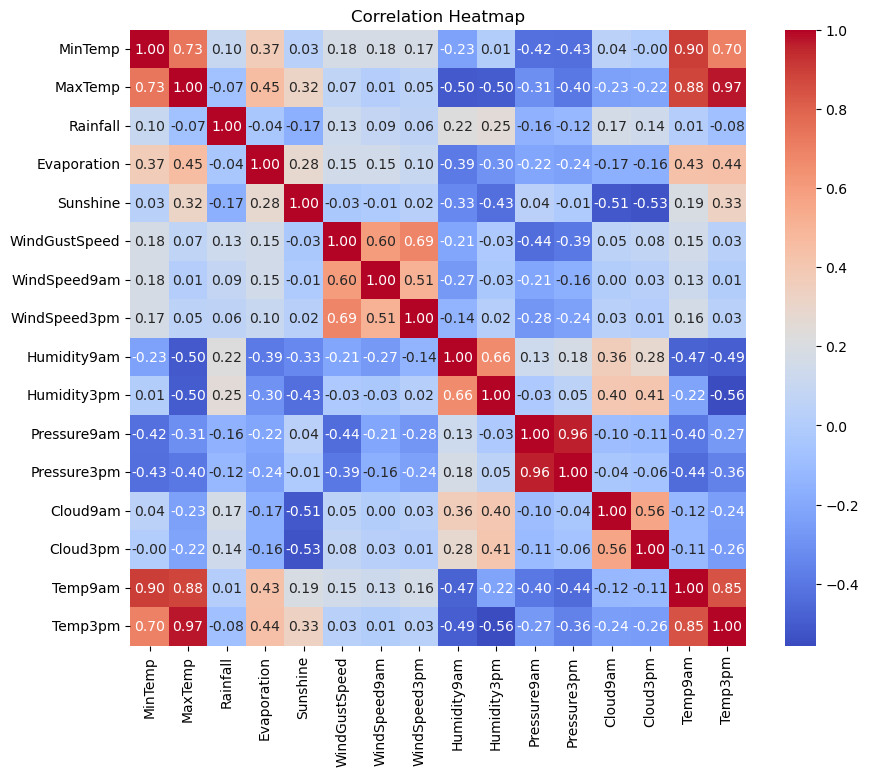

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming weather_data_pd is your cleaned and processed Pandas DataFrame

# Calculate the correlation matrix using only numeric columns
numeric_columns = weather_data_pd.select_dtypes(include='number')  # This will create a numeric-only DataFrame

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [41]:
weather_data_pd = pd.get_dummies(weather_data_pd, columns=['Location', 'RainToday'], drop_first=True)

In [42]:
# Convert target variable to numerical (0 for 'No', 1 for 'Yes')
label_encoder = LabelEncoder()
weather_data_pd['RainTomorrow'] = label_encoder.fit_transform(weather_data_pd['RainTomorrow'])

In [45]:
print(weather_data_pd.columns.tolist())

['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'L

In [46]:
X = weather_data_pd.drop(['WindGustDir','RainTomorrow', 'Date', 'Year_Month','Year','Month','WindDir3pm','WindDir9am'], axis=1)
y = weather_data_pd['RainTomorrow'] 

KeyError: "['Year_Month', 'Year', 'Month'] not found in axis"

In [44]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'X' is not defined

In [20]:
# Initialize the Logistic Regression model
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [21]:
# Train the model
model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [22]:
print(model.score(X_test, y_test)*100)

NameError: name 'X_test' is not defined

In [23]:
# Make predictions on the test set
y_pred = model.predict(X_test)

NameError: name 'X_test' is not defined

In [24]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

NameError: name 'y_test' is not defined

In [25]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
             xticklabels=['No Rain', 'Rain'], 
             yticklabels=['No Rain', 'Rain'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

NameError: name 'y_test' is not defined